<a href="https://colab.research.google.com/github/Poorya0071/Classification/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST
The aim of this project is to find the best model for Mnist dataset.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
len(train_data), len(test_data), len(train_labels), len(test_labels)

(60000, 10000, 60000, 10000)

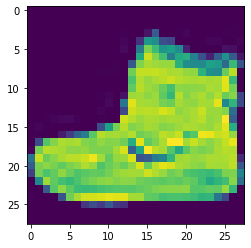

In [4]:
plt.imshow(train_data[0])

In [5]:
train_data.shape

(60000, 28, 28)

# Scale the dataset

In [16]:
train_data = train_data/255

In [17]:
test_data_scaled = test_data/255

In [6]:
train_labels[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [7]:
import pandas as pd
label_data = pd.DataFrame(train_labels)

In [8]:
label_data.value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

# Medel_0: Dense model increasing layers from 16 to 64, LR= 0.0001





In [19]:
tf.random.set_seed(42)

model_0 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
], name= 'model_0')

model_0.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr= 0.0001),
                metrics = ['accuracy'])

model_0.fit(train_data,train_labels, epochs = 60, validation_data = (test_data_scaled, test_labels))

Epoch 1/60
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9690 - accuracy: 0.6675 - val_loss: 0.6537 - val_accuracy: 0.7714
Epoch 2/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5705 - accuracy: 0.8034 - val_loss: 0.5511 - val_accuracy: 0.8110
Epoch 3/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4994 - accuracy: 0.8284 - val_loss: 0.5114 - val_accuracy: 0.8215
Epoch 4/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4661 - accuracy: 0.8388 - val_loss: 0.4837 - val_accuracy: 0.8342
Epoch 5/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4463 - accuracy: 0.8451 - val_loss: 0.4726 - val_accuracy: 0.8341
Epoch 6/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4315 - accuracy: 0.8494 - val_loss: 0.4658 - val_accuracy: 0.8364
Epoch 7/60
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4200 - accuracy: 0.8536 - val_loss: 0.4609 - val_accuracy:

# Medel_1: Dense model increasing layers from 16 to 256


In [22]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
], name= 'model_1')

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_1.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5559 - accuracy: 0.7975 - val_loss: 0.4695 - val_accuracy: 0.8309
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4111 - accuracy: 0.8499 - val_loss: 0.4420 - val_accuracy: 0.8437
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3835 - accuracy: 0.8577 - val_loss: 0.4427 - val_accuracy: 0.8369
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3610 - accuracy: 0.8671 - val_loss: 0.4115 - val_accuracy: 0.8499
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3477 - accuracy: 0.8698 - val_loss: 0.3995 - val_accuracy: 0.8534
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3361 - accuracy: 0.8736 - val_loss: 0.3963 - val_accuracy: 0.8530
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3272 - accuracy: 0.8784 - val_loss: 0.3999 - val_accuracy:

# Medel_2: Dense model decreasing layers from 256 to 16


In [23]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
], name= 'model_2')

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_2.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5467 - accuracy: 0.8065 - val_loss: 0.4274 - val_accuracy: 0.8482
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3780 - accuracy: 0.8615 - val_loss: 0.4542 - val_accuracy: 0.8470
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3394 - accuracy: 0.8752 - val_loss: 0.4064 - val_accuracy: 0.8520
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8849 - val_loss: 0.3724 - val_accuracy: 0.8656
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2970 - accuracy: 0.8903 - val_loss: 0.3527 - val_accuracy: 0.8735
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2818 - accuracy: 0.8941 - val_loss: 0.3619 - val_accuracy: 0.8686
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2699 - accuracy: 0.8988 - val_loss: 0.3730 - val_accuracy:

## Mosel_3: Conv2D increasing layers from 8 to 32

In [34]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_3 = Sequential([
  Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

In [35]:
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [36]:
model_3.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7190 - accuracy: 0.7370 - val_loss: 0.5621 - val_accuracy: 0.7942
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5134 - accuracy: 0.8151 - val_loss: 0.5364 - val_accuracy: 0.8089
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4687 - accuracy: 0.8303 - val_loss: 0.4711 - val_accuracy: 0.8291
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4404 - accuracy: 0.8417 - val_loss: 0.4525 - val_accuracy: 0.8396
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4232 - accuracy: 0.8471 - val_loss: 0.4493 - val_accuracy: 0.8411
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4067 - accuracy: 0.8532 - val_loss: 0.4654 - val_accuracy: 0.8347
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3925 - accuracy: 0.8584 - val_loss: 0.4319 - val_accuracy:

# Mosel_4: Conv2D decreasing layers from 32 to 8

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(8, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_4.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1147 - accuracy: 0.6086 - val_loss: 0.7728 - val_accuracy: 0.7378
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7065 - accuracy: 0.7449 - val_loss: 0.7052 - val_accuracy: 0.7482
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6440 - accuracy: 0.7600 - val_loss: 0.6568 - val_accuracy: 0.7573
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6007 - accuracy: 0.7754 - val_loss: 0.6243 - val_accuracy: 0.7711
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5733 - accuracy: 0.7868 - val_loss: 0.5861 - val_accuracy: 0.7847
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5460 - accuracy: 0.7982 - val_loss: 0.5673 - val_accuracy: 0.7907
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5148 - accuracy: 0.8095 - val_loss: 0.5375 - val_accuracy:

# model_5: combnation of Con2d from 8 to 32 and Dens with 256 layers

In [46]:

model_5 = Sequential([
  Conv2D(8, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(16, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(256, activation = 'relu'),
  Dense(10, activation='softmax')
])

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6846 - accuracy: 0.7475 - val_loss: 0.5214 - val_accuracy: 0.8105
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4777 - accuracy: 0.8269 - val_loss: 0.5164 - val_accuracy: 0.8140
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4262 - accuracy: 0.8440 - val_loss: 0.4337 - val_accuracy: 0.8401
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3918 - accuracy: 0.8564 - val_loss: 0.4008 - val_accuracy: 0.8519
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3697 - accuracy: 0.8637 - val_loss: 0.4050 - val_accuracy: 0.8588
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3522 - accuracy: 0.8702 - val_loss: 0.3988 - val_accuracy: 0.8527
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3367 - accuracy: 0.8759 - val_loss: 0.3911 - val_accuracy:

# model_5: combnation of Con2d from 8 to 32 and Dens with 128 layers

In [47]:

model_5 = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(64, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation='softmax')
])

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_5.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4529 - accuracy: 0.8359 - val_loss: 0.3469 - val_accuracy: 0.8753
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3024 - accuracy: 0.8896 - val_loss: 0.3455 - val_accuracy: 0.8723
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2569 - accuracy: 0.9039 - val_loss: 0.2866 - val_accuracy: 0.8920
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2233 - accuracy: 0.9171 - val_loss: 0.2624 - val_accuracy: 0.9068
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1980 - accuracy: 0.9259 - val_loss: 0.2643 - val_accuracy: 0.9038
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1745 - accuracy: 0.9351 - val_loss: 0.2783 - val_accuracy: 0.9010
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1550 - accuracy: 0.9414 - val_loss: 0.2625 - val_accuracy:

# model_6: combnation of Con2d from 8 to 32 and Dens with 128 layers and same padding

In [48]:

model_6 = Sequential([
  Conv2D(32, 3, activation='relu',padding='same', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(64, 3,padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(10, activation='softmax')
])

model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_6.fit(train_data,train_labels, epochs = 30, validation_data = (test_data_scaled, test_labels))

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3921 - accuracy: 0.8582 - val_loss: 0.3140 - val_accuracy: 0.8882
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2576 - accuracy: 0.9054 - val_loss: 0.3268 - val_accuracy: 0.8816
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2143 - accuracy: 0.9207 - val_loss: 0.2527 - val_accuracy: 0.9074
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1810 - accuracy: 0.9323 - val_loss: 0.2331 - val_accuracy: 0.9154
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1557 - accuracy: 0.9425 - val_loss: 0.2348 - val_accuracy: 0.9160
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1315 - accuracy: 0.9500 - val_loss: 0.2725 - val_accuracy: 0.9096
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1099 - accuracy: 0.9590 - val_loss: 0.2473 - val_accuracy:

In [49]:
model_6 = Sequential([
  Conv2D(32, 3, activation='relu',padding='same', input_shape=(28, 28, 1)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(64, 3,padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation = 'relu'),
  Dense(256, activation = 'relu'),
  Dense(512, activation = 'relu'),
  Dense(10, activation='softmax')
])

model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

model_6.fit(train_data,train_labels, epochs = 50, validation_data = (test_data_scaled, test_labels))

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4133 - accuracy: 0.8469 - val_loss: 0.3333 - val_accuracy: 0.8835
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2623 - accuracy: 0.9023 - val_loss: 0.3463 - val_accuracy: 0.8800
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2187 - accuracy: 0.9200 - val_loss: 0.2537 - val_accuracy: 0.9070
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1897 - accuracy: 0.9297 - val_loss: 0.2731 - val_accuracy: 0.9072
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1643 - accuracy: 0.9389 - val_loss: 0.2660 - val_accuracy: 0.9079
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1442 - accuracy: 0.9456 - val_loss: 0.2519 - val_accuracy: 0.9141
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1245 - accuracy: 0.9529 - val_loss: 0.2730 - val_accuracy:

# conclusion

We can conclude that the combination of Dense and Conv 2d with the same padding work the best.